In [72]:
print(success_20['LocationAbbr'].nunique())
print(success_21['LocationAbbr'].nunique())
print(success_22['LocationAbbr'].nunique())
print(filtered_summary_success_20['LocationAbbr'].nunique())
print(filtered_summary_success_21['LocationAbbr'].nunique())
print(filtered_summary_success_22['LocationAbbr'].nunique())

50
47
43
40
44
36


In [78]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

region_map = {'CT' : 'NorthEast', 'ME' : 'NorthEast', 'MA' : 'NorthEast', 'NH' : 'NorthEast', 'RI' : 'NorthEast', 'VT' : 'NorthEast', 'NJ' : 'NorthEast', 'NY' : 'NorthEast', 'PA' : 'NorthEast',
              
              'IL' : 'MidWest', 'IN' : 'MidWest', 'MI' : 'MidWest', 'OH' : 'MidWest', 'WI' : 'MidWest', 'IA' : 'MidWest', 'KS' : 'MidWest', 'MN': 'MidWest', 'MO' : 'MidWest', 'NE' : 'MidWest',
              'ND': 'MidWest', 'SD' : 'MidWest',
              
              'DE' : 'South', 'DC' : 'South', 'FL' : 'South', 'GA' : 'South', 'MD' : 'South', 'NC' : 'South', 'SC' : 'South', 'VA' : 'South', 'WV': 'South', 'AL' : 'South', 'KY' : 'South', 'MS' : 'South',
              'TN' : 'South', 'AR' : 'South', 'LA' : 'South', 'OK' : 'South', 'TX' : 'South',
              
              'AZ' : 'West', 'CO' : 'West', 'ID' : 'West', 'MT' : 'West', 'NV' : 'West', 'NM' : 'West', 'UT' : 'West', 'WY' : 'West', 'AK' : 'West', 'CA' : 'West', 'HI': 'West', 'OR' : 'West', 'WA' : 'West' }


success_20 = pd.read_csv('2020SuccessRates.csv')
profile_20 = pd.read_csv('2020Profiles.csv')
cycle_20 = pd.read_csv('2020ARTCycles.csv')

success_21 = pd.read_csv('2021SuccessRates.csv')
profile_21 = pd.read_csv('2021Profiles.csv')
cycle_21 = pd.read_csv('2021Cycles.csv')

success_22 = pd.read_csv('2022SuccessRates.csv')
profile_22 = pd.read_csv('2022Profiles.csv')
cycle_22 = pd.read_csv('2022Cycles.csv')


filtered_summary_success_20 = success_20[success_20['Data_Value_Footnote'].isna() | (success_20['Data_Value_Footnote'] == '')]
summary_success_20 = filtered_summary_success_20.groupby('LocationAbbr')['Data_Value_num'].mean().reset_index()
summary_success_20 = summary_success_20.sort_values(by='LocationAbbr').reset_index(drop = 'True')


filtered_summary_success_21 = success_21[success_21['Data_Value_Footnote'].isna() | (success_21['Data_Value_Footnote'] == '')]
summary_success_21 = filtered_summary_success_21.groupby('LocationAbbr')['Data_Value_num'].mean().reset_index()
summary_success_21 = summary_success_21.sort_values(by='LocationAbbr').reset_index(drop = 'True')


filtered_summary_success_22 = success_22[success_22['Data_Value_Footnote'].isna() | (success_22['Data_Value_Footnote'] == '')]
summary_success_22 = filtered_summary_success_22.groupby('LocationAbbr')['Data_Value_num'].mean().reset_index()
summary_success_22 = summary_success_22.sort_values(by='LocationAbbr').reset_index(drop = 'True')


counts_per_state_20 = filtered_summary_success_20.groupby('LocationAbbr')['Data_Value_num'].count().reset_index(name = 'Count')
counts_per_state_21 = filtered_summary_success_21.groupby('LocationAbbr')['Data_Value_num'].count().reset_index(name = 'Count')
counts_per_state_22 = filtered_summary_success_22.groupby('LocationAbbr')['Data_Value_num'].count().reset_index(name = 'Count')

states_over_10_20 = counts_per_state_20[counts_per_state_20['Count'] > 10]['LocationAbbr']
states_over_10_21 = counts_per_state_21[counts_per_state_21['Count'] > 10]['LocationAbbr']
states_over_10_22 = counts_per_state_22[counts_per_state_22['Count'] > 10]['LocationAbbr']


filtered_over_10_20 = summary_success_20[summary_success_20['LocationAbbr'].isin(states_over_10_20)].reset_index()
filtered_over_10_21 = summary_success_21[summary_success_21['LocationAbbr'].isin(states_over_10_21)].reset_index()
filtered_over_10_22 = summary_success_22[summary_success_22['LocationAbbr'].isin(states_over_10_22)].reset_index()

filtered_over_10_20['Region'] = filtered_over_10_20['LocationAbbr'].map(region_map)
filtered_over_10_21['Region'] = filtered_over_10_21['LocationAbbr'].map(region_map)
filtered_over_10_22['Region'] = filtered_over_10_22['LocationAbbr'].map(region_map)

summary_region_20 = filtered_over_10_20.groupby('Region')['Data_Value_num'].mean().reset_index()
summary_region_21 = filtered_over_10_21.groupby('Region')['Data_Value_num'].mean().reset_index()
summary_region_22 = filtered_over_10_22.groupby('Region')['Data_Value_num'].mean().reset_index()

summary_region_20["Year"] = 2020 
summary_region_21["Year"] = 2021
summary_region_22["Year"] = 2022

region_combined = pd.concat([summary_region_20, summary_region_21, summary_region_22], ignore_index = True)
summary_region_yr = region_combined.groupby(['Region', 'Year'])['Data_Value_num'].mean().reset_index()




FileNotFoundError: [Errno 2] No such file or directory: '2020SuccessRates.csv'

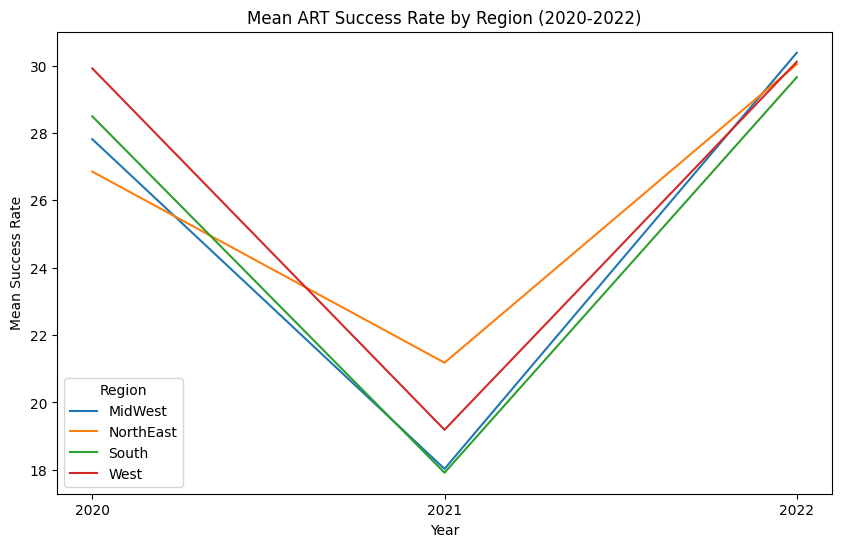

In [79]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = summary_region_yr, x = 'Year', y = 'Data_Value_num', hue = 'Region')
plt.title('Mean ART Success Rate by Region (2020-2022)')
plt.ylabel('Mean Success Rate')
plt.xticks([2020, 2021, 2022])
plt.legend(title = 'Region')
plt.show()

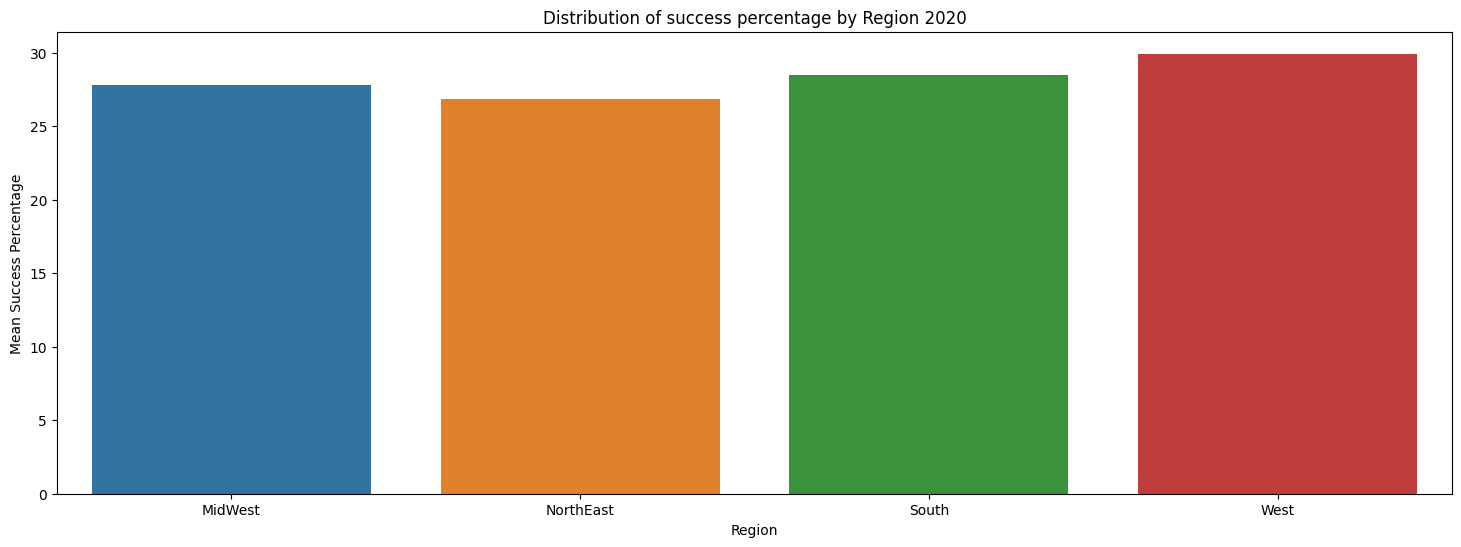

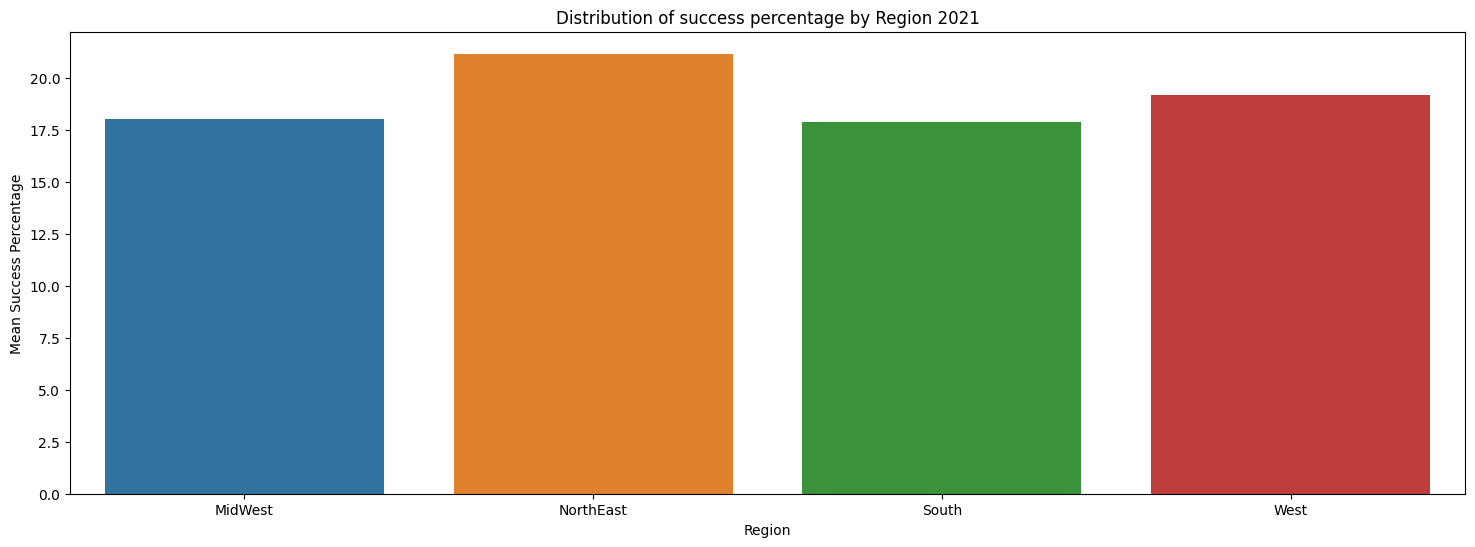

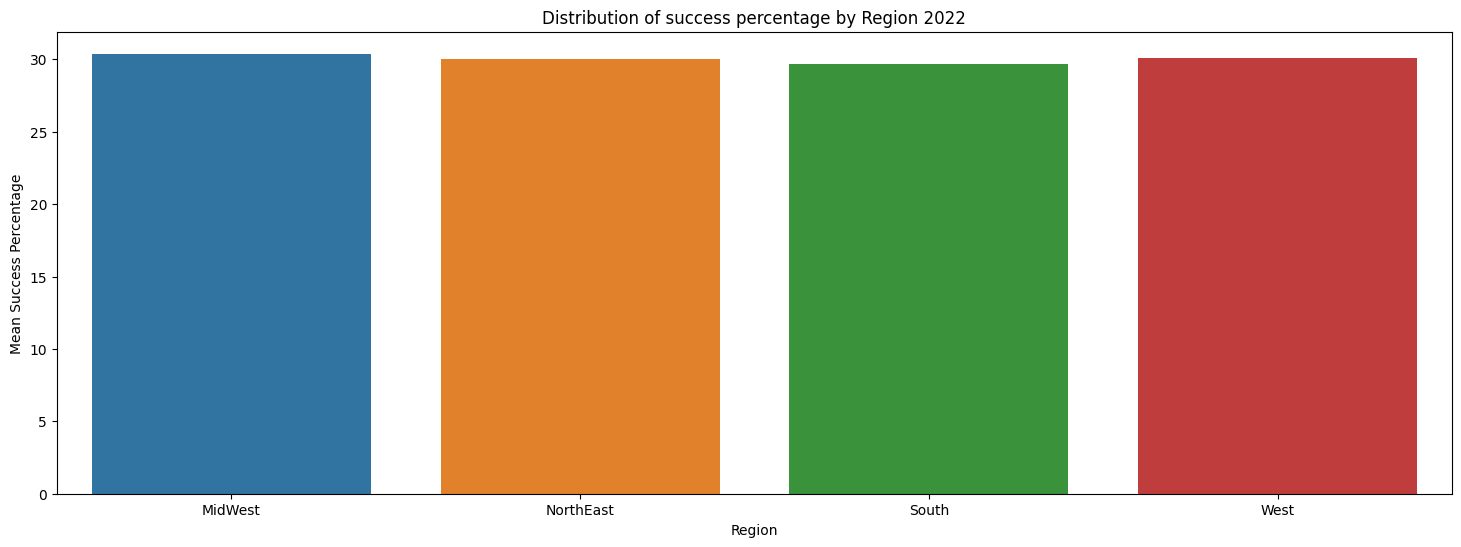

In [80]:
region_order = sorted(summary_region_20['Region'].unique())
plt.figure(figsize=(18, 6))
sns.barplot(data = summary_region_20, x = 'Region', y = 'Data_Value_num', order = region_order)
plt.title('Distribution of success percentage by Region 2020')
plt.xlabel('Region')
plt.ylabel('Mean Success Percentage')
plt.savefig('reg_suc_20.pdf', bbox_inches = 'tight')
plt.show()
plt.figure(figsize=(18, 6))
sns.barplot(data = summary_region_21, x = 'Region', y = 'Data_Value_num', order = region_order)
plt.title('Distribution of success percentage by Region 2021')
plt.xlabel('Region')
plt.ylabel('Mean Success Percentage')
plt.savefig('reg_suc_21.pdf', bbox_inches = 'tight')
plt.show()
plt.figure(figsize=(18, 6))
sns.barplot(data = summary_region_22, x = 'Region', y = 'Data_Value_num', order = region_order)
plt.title('Distribution of success percentage by Region 2022')
plt.xlabel('Region')
plt.ylabel('Mean Success Percentage')
plt.savefig('reg_suc_22.pdf', bbox_inches = 'tight')
plt.show()

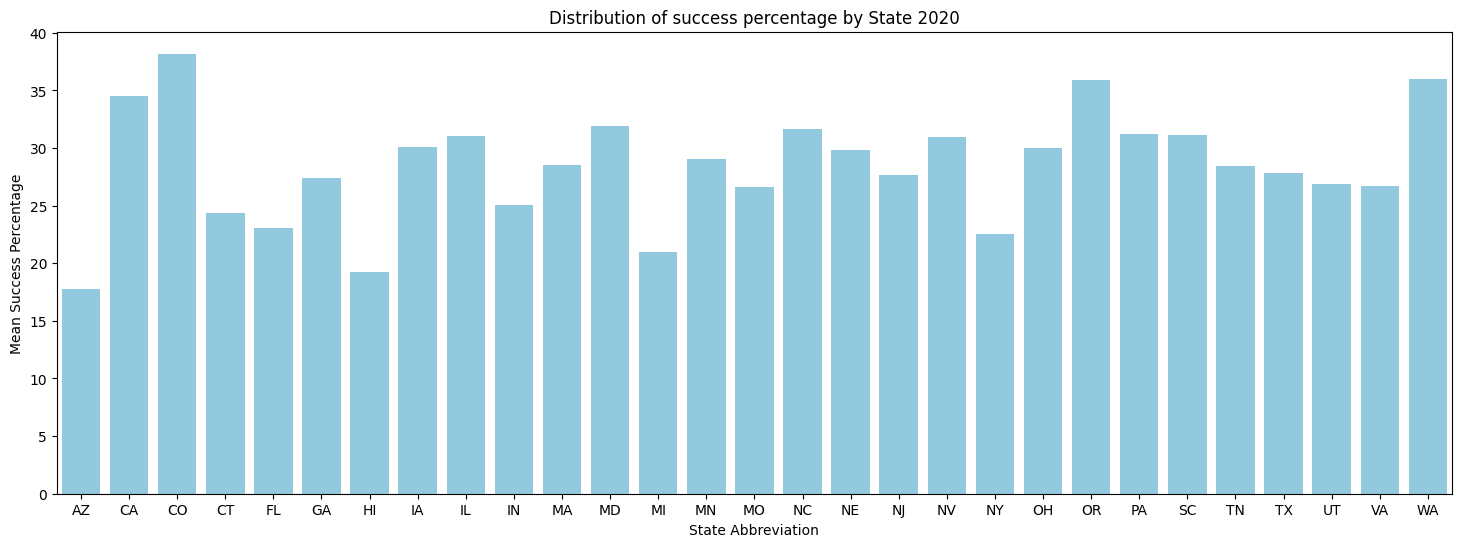

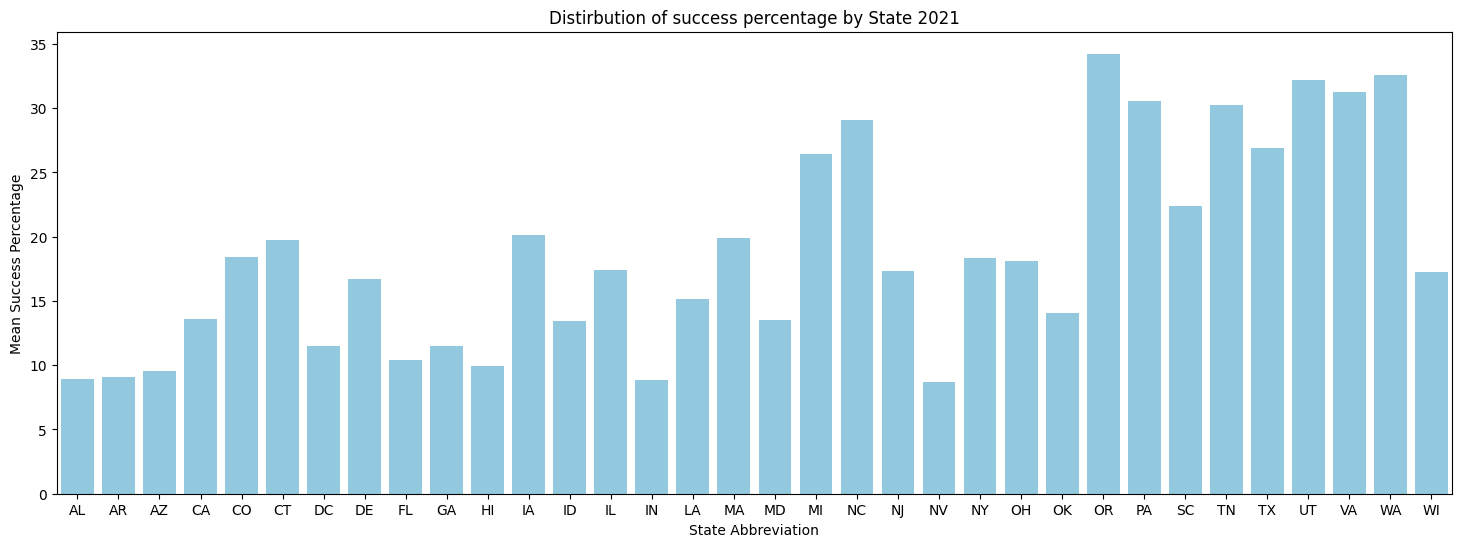

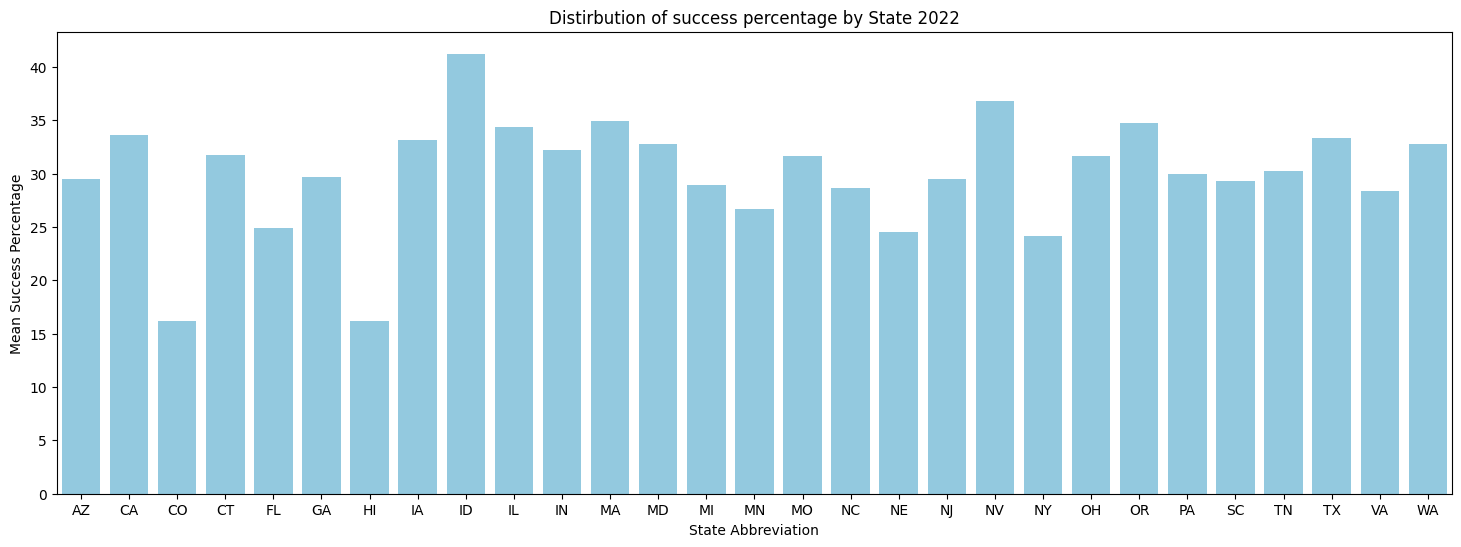

In [81]:
plt.figure(figsize=(18, 6))
sns.barplot(data = filtered_over_10_20, x = 'LocationAbbr', y = 'Data_Value_num', color = 'skyblue')
plt.title('Distribution of success percentage by State 2020')
plt.xlabel('State Abbreviation')
plt.ylabel('Mean Success Percentage')
plt.savefig
plt.show()

plt.figure(figsize=(18, 6))
sns.barplot(data = filtered_over_10_21, x = 'LocationAbbr', y = 'Data_Value_num', color = 'skyblue')
plt.title('Distirbution of success percentage by State 2021')
plt.xlabel('State Abbreviation')
plt.ylabel('Mean Success Percentage')
plt.show()

plt.figure(figsize=(18, 6))
sns.barplot(data = filtered_over_10_22, x = 'LocationAbbr', y = 'Data_Value_num', color = 'skyblue')
plt.title('Distirbution of success percentage by State 2022')
plt.xlabel('State Abbreviation')
plt.ylabel('Mean Success Percentage')
plt.show()

In [90]:
type_2020 = success_20['Type'].unique()

filtered_20_type = success_20[success_20['Data_Value_Footnote'].isna() | (success_20['Data_Value_Footnote'] == '')]
filtered_20_type = filtered_20_type.groupby(['Type'])['Data_Value_num'].mean().reset_index()
filtered_20_type['Year'] = 2020

filtered_21_type = success_21[success_21['Data_Value_Footnote'].isna() | (success_21['Data_Value_Footnote'] == '')]
filtered_21_type = filtered_21_type.groupby(['Type'])['Data_Value_num'].mean().reset_index()
filtered_21_type['Year'] = 2021


filtered_22_type = success_22[success_22['Data_Value_Footnote'].isna() | (success_22['Data_Value_Footnote'] == '')]
filtered_22_type = filtered_22_type.groupby(['Type'])['Data_Value_num'].mean().reset_index()
filtered_22_type['Year'] = 2022

summary_type = pd.concat([filtered_20_type, filtered_21_type, filtered_22_type], ignore_index= True)
summary_type = summary_type[summary_type['Data_Value_num'].notna()]

In [91]:
print(type_2020)

['Patients using donor eggs/embryos'
 'Patients with no prior ART using their own eggs'
 'Patients using their own eggs']


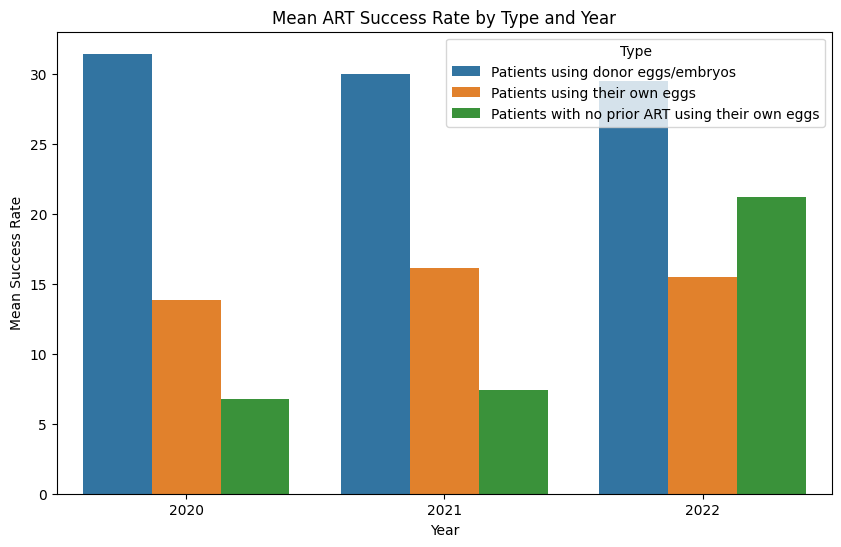

In [92]:
plt.figure(figsize = (10, 6))
sns.barplot(data = summary_type, x = 'Year', y = 'Data_Value_num', hue ='Type')
plt.title('Mean ART Success Rate by Type and Year')
plt.ylabel('Mean Success Rate')
plt.xlabel('Year')
plt.legend(title = 'Type')
plt.show()

In [93]:
cycle_20["Question"].unique()

array(['What percentage of transfers used a gestational carrier?',
       'What were the reasons patients used ART?',
       'What were the ages of patients who used ART?',
       'What percentage of transfers used frozen embryos?',
       'What percentage of cycles were discontinued after retrieval and before transfer or banking?',
       'What was the percentage of cycles in which patients used donor eggs or embryos?',
       'What was the percentage of cycles used for fertility preservation?',
       'What was the average number of embryos transferred?',
       'What percentage of transfers used intracytoplasmic sperm injection (ICSI)?',
       'What was the percentage of cycles discontinued before an egg or embryo was transferred or banked?',
       'What percentage of egg retrieval cycles were discontinued without any eggs retrieved?',
       'What was the percentage of cycles in which patients used their own eggs and embryos?',
       'What percentage of embryo transfers used a s

In [94]:
fac_name = cycle_20.loc[cycle_20["ClinicId"] == 37, 'FacilityName'].values[0]
print(fac_name)
fac_name_2 = success_20.loc[success_20["ClinicId"] == 37, 'FacilityName'].values[0]
print(fac_name_2 == fac_name)

def clinics(df1, df2, id_col = 'ClinicId', name_col='FacilityName'):
    #merge
    merged = df1[[id_col, name_col]].merge(df2[[id_col, name_col]], on = id_col, suffixes = ('_df1', '_df2'), how = 'inner')
    mismatches = merged[merged[f'{name_col}_df1'] != merged[f'{name_col}_df2']]
    if mismatches.empty:
        print('All clinic IDS match')
    else:
        print('Mismatches')
        print(len(mismatches))
    return
clinics(cycle_20, success_20)
clinics(cycle_21, success_21)
clinics(cycle_22, success_22)

Mid-Iowa Fertility, PC
True
All clinic IDS match
All clinic IDS match
All clinic IDS match


In [95]:
print(filtered_summary_success_20.columns)

Index(['Year', 'LocationAbbr', 'LocationDesc', 'FacilityName',
       'MedicalDirector', 'Address', 'City', 'ZipCode', 'Phone',
       'Clinic Status', 'Type', 'Topic', 'Question', 'Filter',
       'Breakout_Category', 'Breakout', 'Data_Value', 'Data_Value_num',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Cycle_Count',
       'ClinicId', 'TypeId', 'TopicId', 'QuestionId', 'FilterId',
       'BreakOutCategoryId', 'BreakOutId', 'GeoLocation'],
      dtype='object')


In [96]:
success_22['Question'].unique()

array(['What percentage of embryo transfers resulted in live-birth deliveries?',
       'What was the average number of intended egg retrievals per live-birth delivery?',
       'What percentage of transfers resulted in singleton live-birth deliveries?',
       'What percentage of transfers resulted in single, term, normal weight live-birth deliveries?',
       'What percentage of embryo transfers resulted in multiple live-birth deliveries?',
       'What percentage of intended egg retrievals resulted in singleton live-birth deliveries?',
       'What percentage of new patients had live-birth deliveries after 1 intended egg retrieval?',
       'What percentage of new patients had live-birth deliveries after 1 or 2 intended egg retrievals?',
       'What percentage of intended egg retrievals resulted in single, term, normal weight live-birth deliveries?',
       'What percentage of transfers resulted in multiple live-birth deliveries?',
       'What percentage of new patients had live-b

In [97]:
excluded = ['What was the average number of transfers per intended egg retrieval?', 
            'What was the average number of intended egg retrievals per new patient?']           

In [98]:
success_20_QF = filtered_summary_success_20[~filtered_summary_success_20["Question"].isin(excluded)].copy()
success_20_QF['Expected # Cycles'] = 1/(success_20_QF['Data_Value_num']/100)

success_21_QF = filtered_summary_success_21[~filtered_summary_success_21["Question"].isin(excluded)].copy()
success_21_QF['Expected # Cycles'] = 1/(success_21_QF['Data_Value_num']/100)

success_22_QF = filtered_summary_success_22[~filtered_summary_success_22["Question"].isin(excluded)].copy()
success_22_QF['Expected # Cycles'] = 1/(success_22_QF['Data_Value_num']/100)


In [99]:
clean_20 = success_20_QF[
    success_20_QF['Expected # Cycles'].notna() &
    ~success_20_QF['Expected # Cycles'].isin([-np.inf, np.inf])
]
clean_21 = success_21_QF[
    success_21_QF['Expected # Cycles'].notna() &
    ~success_21_QF['Expected # Cycles'].isin([-np.inf, np.inf])]
clean_22 = success_22_QF[
    success_22_QF['Expected # Cycles'].notna() &
    ~success_22_QF['Expected # Cycles'].isin([-np.inf, np.inf])
]

In [100]:
top_10_exp_20 = clean_20.nsmallest(10, 'Expected # Cycles')

In [101]:
top_10_exp_21 = clean_21.nsmallest(10, 'Expected # Cycles')

In [102]:
top_10_exp_22 = clean_22.nsmallest(10, 'Expected # Cycles')

In [103]:
print(clean_20['Expected # Cycles'].mean())

8.537389136004697


In [104]:
print(clean_21['Expected # Cycles'].mean())

11.86647501634556


In [105]:
print(clean_22['Expected # Cycles'].mean())

8.748431370770913


In [106]:
top_10_exp_22.iloc[0,10:19]

Type                                          Patients using donor eggs/embryos
Topic                                  Success Rates: Patients Using Donor Eggs
Question                      What percentage of embryo transfers resulted i...
Filter                                                                No filter
Breakout_Category                                               Egg/embryo type
Breakout                                                         Frozen Embryos
Data_Value                                                                 95.7
Data_Value_num                                                             95.7
Data_Value_Footnote_Symbol                                                  NaN
Name: 2979, dtype: object

In [107]:
top_10_exp_21.iloc[0,10:19]

Type                            Patients with no prior ART using their own eggs
Topic                                    Success Rates: Patients Using Own Eggs
Question                      What percentage of new patients had live-birth...
Filter                                                    Ovulatory dysfunction
Breakout_Category                                                Age of Patient
Breakout                                                                    <35
Data_Value                                                                 93.0
Data_Value_num                                                             93.0
Data_Value_Footnote_Symbol                                                  NaN
Name: 51932, dtype: object

In [108]:
top_10_exp_20.iloc[0,10:19]

Type                                          Patients using donor eggs/embryos
Topic                                  Success Rates: Patients Using Donor Eggs
Question                      What percentage of embryo transfers resulted i...
Filter                                                                No filter
Breakout_Category                                               Egg/embryo type
Breakout                                               Fresh embryos fresh eggs
Data_Value                                                                 95.2
Data_Value_num                                                             95.2
Data_Value_Footnote_Symbol                                                  NaN
Name: 14994, dtype: object

In [109]:
print(top_10_exp_20['ClinicId'])

14994    300.0
7265     300.0
12958    300.0
12752    300.0
12700    255.0
13782    300.0
16176    255.0
13679    300.0
36053    491.0
35954     50.0
Name: ClinicId, dtype: float64


In [110]:
print(top_10_exp_20['Breakout'])

14994     Fresh embryos fresh eggs
7265      Fresh embryos fresh eggs
12958     Fresh embryos fresh eggs
12752     Fresh embryos fresh eggs
12700    Fresh embryos frozen eggs
13782     Fresh embryos fresh eggs
16176    Fresh embryos frozen eggs
13679     Fresh embryos fresh eggs
36053    Fresh embryos frozen eggs
35954    Fresh embryos frozen eggs
Name: Breakout, dtype: object


In [111]:
print(top_10_exp_21['Breakout'])

51932    <35
54440    <35
54888    <35
57111    <35
59590    <35
54008    <35
58797    <35
59709    <35
31781    <35
39719    <35
Name: Breakout, dtype: object


In [112]:
print(top_10_exp_22['Breakout'])

2979               Frozen Embryos
2974               Frozen Embryos
16477    Fresh Embryos Fresh Eggs
3015               Frozen Embryos
16482    Fresh Embryos Fresh Eggs
3010               Frozen Embryos
16513    Fresh Embryos Fresh Eggs
16518    Fresh Embryos Fresh Eggs
7967               Frozen Embryos
33694              Frozen Embryos
Name: Breakout, dtype: object


In [113]:
print(top_10_exp_20['Type'])

14994    Patients using donor eggs/embryos
7265     Patients using donor eggs/embryos
12958    Patients using donor eggs/embryos
12752    Patients using donor eggs/embryos
12700    Patients using donor eggs/embryos
13782    Patients using donor eggs/embryos
16176    Patients using donor eggs/embryos
13679    Patients using donor eggs/embryos
36053    Patients using donor eggs/embryos
35954    Patients using donor eggs/embryos
Name: Type, dtype: object


In [114]:
print(top_10_exp_21['Type'])

51932    Patients with no prior ART using their own eggs
54440    Patients with no prior ART using their own eggs
54888    Patients with no prior ART using their own eggs
57111    Patients with no prior ART using their own eggs
59590                      Patients using their own eggs
54008    Patients with no prior ART using their own eggs
58797    Patients with no prior ART using their own eggs
59709    Patients with no prior ART using their own eggs
31781    Patients with no prior ART using their own eggs
39719    Patients with no prior ART using their own eggs
Name: Type, dtype: object


In [115]:
print(top_10_exp_22['Type'])

2979     Patients using donor eggs/embryos
2974     Patients using donor eggs/embryos
16477    Patients using donor eggs/embryos
3015     Patients using donor eggs/embryos
16482    Patients using donor eggs/embryos
3010     Patients using donor eggs/embryos
16513    Patients using donor eggs/embryos
16518    Patients using donor eggs/embryos
7967     Patients using donor eggs/embryos
33694    Patients using donor eggs/embryos
Name: Type, dtype: object


In [116]:
bottom_10_exp_20 = clean_20.nlargest(10, 'Expected # Cycles')

In [117]:
bottom_10_exp_21 = clean_21.nlargest(10, 'Expected # Cycles')

In [118]:
bottom_10_exp_22 = clean_22.nlargest(10, 'Expected # Cycles')

In [119]:
top_10_exp_20.head(1)

,Year,LocationAbbr,LocationDesc,FacilityName,MedicalDirector,Address,City,ZipCode,Phone,Clinic Status,...,Cycle_Count,ClinicId,TypeId,TopicId,QuestionId,FilterId,BreakOutCategoryId,BreakOutId,GeoLocation,Expected # Cycles
14994,2020,IL,Illinois,Advanced Fertility Center of Chicago,"Michelle Catenacci, MD","30 Tower Ct, Suite F",Gurnee,60031.0,(847) 662-1818,Open,...,126.0,300.0,T001,TOP04,Q030,F009,CAT1,B005,POINT (-87.8993371 42.3573697),1.05042


In [120]:
top_10_exp_21.head(1)

,Year,LocationAbbr,LocationDesc,FacilityName,MedicalDirector,Address,City,ZipCode,Phone,Clinic Status,...,Cycle_Count,ClinicId,TypeId,TopicId,QuestionId,FilterId,BreakOutCategoryId,BreakOutId,GeoLocation,Expected # Cycles
51932,2021,IL,Illinois,Advanced Fertility Center of Chicago,"Michelle Catenacci, MD","30 Tower Ct, Suite F",Gurnee,60031.0,(847) 662-1818,Open,...,61.0,300.0,T003,TOP03,Q027,F003,CAT2,B001,POINT (-87.8993 42.3574),1.075269


In [121]:
top_10_exp_22.head(1)

,Year,LocationAbbr,LocationDesc,FacilityName,MedicalDirector,Address,City,ZipCode,Phone,Clinic Status,...,Cycle_Count,ClinicId,TypeId,TopicId,QuestionId,FilterId,BreakOutCategoryId,BreakOutId,GeoLocation,Expected # Cycles
2979,2022,CA,California,Fertility Center of Southern California,"Ilene E. Hatch, MD","4980 Barranca Pkwy, Suite 200",Irvine,92604.0,(949) 955-0072,Open,...,32.0,211,T001,TOP04,Q030,F009,CAT1,B007,POINT (-117.794 33.6757),1.044932


In [122]:
print(bottom_10_exp_20['Type'])

269          Patients using their own eggs
302          Patients using their own eggs
19021    Patients using donor eggs/embryos
20984    Patients using donor eggs/embryos
149          Patients using their own eggs
8121     Patients using donor eggs/embryos
14018    Patients using donor eggs/embryos
227          Patients using their own eggs
1547     Patients using donor eggs/embryos
3748     Patients using donor eggs/embryos
Name: Type, dtype: object


In [123]:
print(bottom_10_exp_21['Type'])

7737         Patients using their own eggs
32317        Patients using their own eggs
35831        Patients using their own eggs
7208     Patients using donor eggs/embryos
30161        Patients using their own eggs
26405        Patients using their own eggs
27474        Patients using their own eggs
31113        Patients using their own eggs
32815        Patients using their own eggs
40355        Patients using their own eggs
Name: Type, dtype: object


In [124]:
print(bottom_10_exp_22['Type'])

16748    Patients using donor eggs/embryos
10290    Patients using donor eggs/embryos
16753    Patients using donor eggs/embryos
19527    Patients using donor eggs/embryos
29995    Patients using donor eggs/embryos
724      Patients using donor eggs/embryos
7196     Patients using donor eggs/embryos
10285    Patients using donor eggs/embryos
5295     Patients using donor eggs/embryos
19522    Patients using donor eggs/embryos
Name: Type, dtype: object


In [125]:
print(bottom_10_exp_20['Breakout'])

269                           >40
302                           >40
19021              Frozen embryos
20984    Fresh embryos fresh eggs
149                           <35
8121               Frozen embryos
14018              Frozen embryos
227                         35-37
1547               Frozen embryos
3748               Frozen embryos
Name: Breakout, dtype: object


In [126]:
print(bottom_10_exp_21['Breakout'])

7737                >40
32317               >40
35831               >40
7208     Frozen Embryos
30161             38-40
26405               >40
27474             38-40
31113               >40
32815               >40
40355               >40
Name: Breakout, dtype: object


In [127]:
print(bottom_10_exp_22['Breakout'])

16748    Frozen Embryos
10290    Frozen Embryos
16753    Frozen Embryos
19527    Frozen Embryos
29995    Frozen Embryos
724      Frozen Embryos
7196     Frozen Embryos
10285    Frozen Embryos
5295     Frozen Embryos
19522    Frozen Embryos
Name: Breakout, dtype: object


In [128]:
print(top_10_exp_20['LocationAbbr'].dropna())

14994    IL
7265     IL
12958    IL
12752    IL
12700    IA
13782    IL
16176    IA
13679    IL
36053    CA
35954    WA
Name: LocationAbbr, dtype: object


In [129]:
print(top_10_exp_21['LocationAbbr'].dropna())

51932    IL
54440    IL
54888    IL
57111    IA
59590    IL
54008    IL
58797    IL
59709    IL
31781    CA
39719    CA
Name: LocationAbbr, dtype: object


In [130]:
print(top_10_exp_22['LocationAbbr'].dropna())

2979     CA
2974     CA
16477    MA
3015     CA
16482    MA
3010     CA
16513    MA
16518    MA
7967     CA
33694    TX
Name: LocationAbbr, dtype: object


In [131]:
print(bottom_10_exp_20['LocationAbbr'].dropna())

19021    NJ
20984    MD
149      MO
8121     NV
14018    NJ
227      MI
1547     NY
3748     NY
Name: LocationAbbr, dtype: object


In [132]:
print(bottom_10_exp_21['LocationAbbr'].dropna())

7737     NY
32317    CO
35831    CO
7208     NY
30161    CA
26405    CA
27474    CA
31113    CO
32815    CA
40355    CO
Name: LocationAbbr, dtype: object


In [133]:
print(bottom_10_exp_22['LocationAbbr'].dropna())

16748    MD
10290    CO
16753    MD
19527    NJ
29995    WA
724      MA
7196     CA
10285    CO
5295     GA
19522    NJ
Name: LocationAbbr, dtype: object


In [134]:
state_order_20 = sorted(success_20_QF['LocationAbbr'].dropna().unique())
state_order_21 = sorted(success_21_QF['LocationAbbr'].dropna().unique())
state_order_22 = sorted(success_22_QF['LocationAbbr'].dropna().unique())

In [135]:
print(clean_20['Expected # Cycles'].dtype)

float64


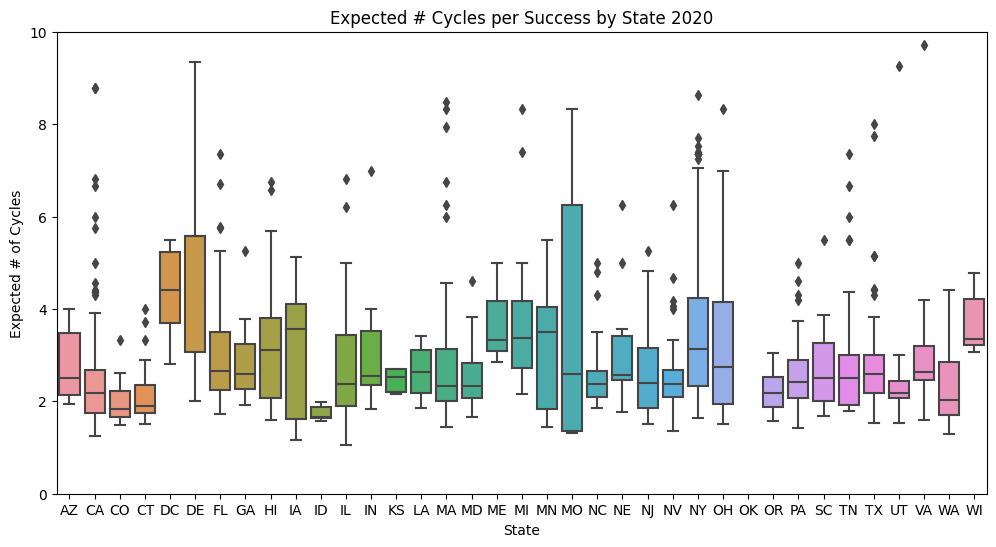

In [136]:


siz_clean_20 = clean_20[clean_20['Expected # Cycles'] < 10]
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'LocationAbbr', y = 'Expected # Cycles', data = siz_clean_20, order = state_order_20)
plt.title('Expected # Cycles per Success by State 2020')
plt.ylabel('Expected # of Cycles')
plt.xlabel('State')
plt.ylim(0, 10)
plt.show()

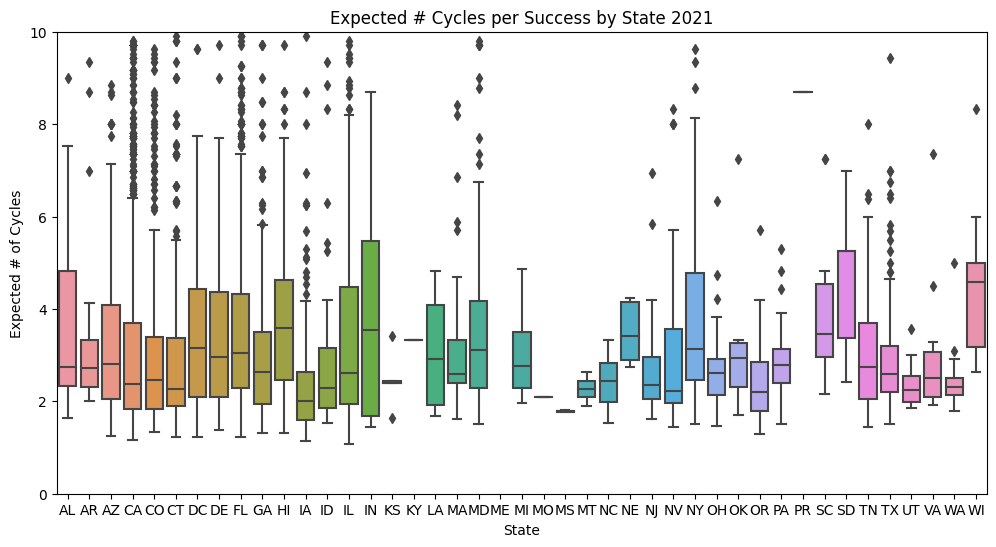

In [137]:


siz_clean_21 = clean_21[clean_21['Expected # Cycles'] < 10]
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'LocationAbbr', y = 'Expected # Cycles', data = siz_clean_21, order = state_order_21)
plt.title('Expected # Cycles per Success by State 2021')
plt.ylabel('Expected # of Cycles')
plt.xlabel('State')
plt.ylim(0,10)
plt.show()
#skewed distribution when ylim > 150

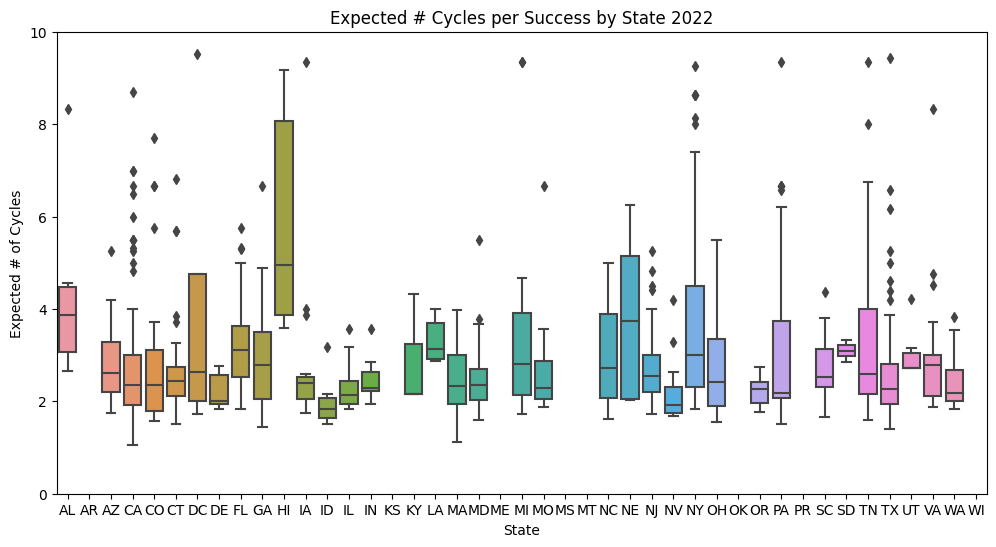

In [138]:


siz_clean_22 = clean_22[clean_22['Expected # Cycles'] < 10]
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'LocationAbbr', y = 'Expected # Cycles', data = siz_clean_22, order = state_order_21)
plt.title('Expected # Cycles per Success by State 2022')
plt.ylabel('Expected # of Cycles')
plt.xlabel('State')
plt.ylim(0,10)
plt.show()

In [139]:
num_cycles_20 = success_20['Cycle_Count'].sum()
num_cycles_21 = success_21['Cycle_Count'].sum()
num_cycles_22 = success_22['Cycle_Count'].sum()
print(num_cycles_20)
print(num_cycles_21)
print(num_cycles_22)

3252883.0
2514131.0
7228336.0


In [140]:
succ_combined = pd.concat([success_20, success_21, success_22], ignore_index = True)

summary_region_yr_cyc = succ_combined.groupby(['Year'])['Cycle_Count'].sum().reset_index()


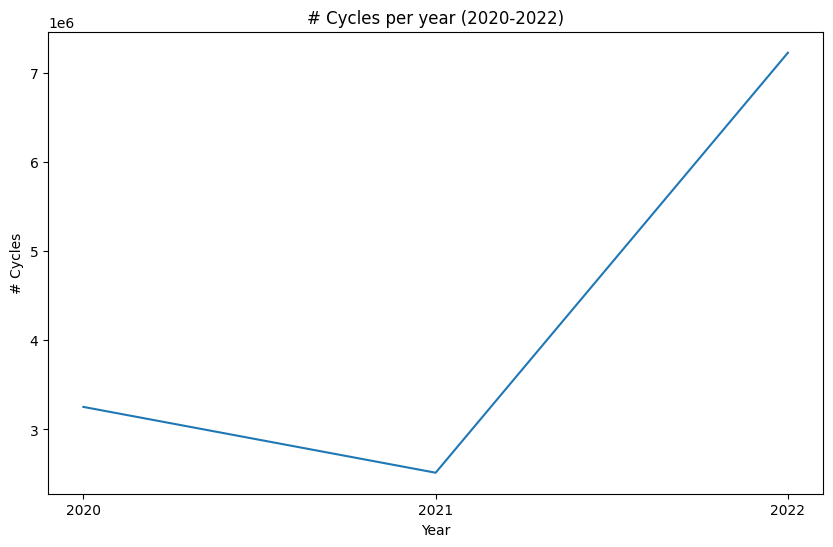

In [141]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = summary_region_yr_cyc, x = 'Year', y = 'Cycle_Count')
plt.title('# Cycles per year (2020-2022)')
plt.ylabel('# Cycles')
plt.xticks([2020, 2021, 2022])

plt.show()

In [142]:
state_means_20 = clean_20.groupby('LocationAbbr')['Expected # Cycles'].mean()
state_means_21 = clean_21.groupby('LocationAbbr')['Expected # Cycles'].mean()
state_means_22 = clean_22.groupby('LocationAbbr')['Expected # Cycles'].mean()

max_state_20 = state_means_20.idxmin()
max_state_val_20 = state_means_20.min()
max_state_21 = state_means_21.idxmin()
max_state_val_21 = state_means_21.min()
max_state_22 = state_means_22.idxmin()
max_state_val_22 = state_means_22.min()

print(max_state_20, max_state_val_20)
print(max_state_21, max_state_val_21)
print(max_state_22, max_state_val_22)

years_ = [2020, 2021, 2022]
min_vals = [max_state_20, max_state_21, max_state_22]




KS 2.458242544449441
MS 1.7844408221480785
KY 2.886002886002886


In [143]:
KS_mean = clean_20[clean_20['LocationAbbr'] == 'KS']
MS_mean = clean_21[clean_21['LocationAbbr'] == 'MS']
KY_mean = clean_22[clean_22['LocationAbbr'] == 'KY']

In [144]:
KS_type_mean = KS_mean.groupby('Type')['Expected # Cycles'].mean()
MS_type_mean = MS_mean.groupby('Type')['Expected # Cycles'].mean()
KY_type_mean = KY_mean.groupby('Type')['Expected # Cycles'].mean()

KS_type_20 = KS_type_mean.idxmin()
KS_val_20 = KS_type_mean.min()
MS_type_21 = MS_type_mean.idxmin()
MS_val_21 = MS_type_mean.min()
KY_type_22 = KY_type_mean.idxmin()
KY_val_22 = KY_type_mean.min()

print(KS_type_20, KS_val_20)
print(MS_type_21, MS_val_21)
print(KY_type_22, KY_val_22)

Patients using donor eggs/embryos 2.458242544449441
Patients using their own eggs 1.7844408221480785
Patients using donor eggs/embryos 2.886002886002886


In [145]:
KS_breakout = KS_mean.groupby('Breakout')['Expected # Cycles'].mean()
MS_breakout = MS_mean.groupby('Breakout')['Expected # Cycles'].mean()
KY_breakout = KY_mean.groupby('Breakout')['Expected # Cycles'].mean()

max_break_KS = KS_breakout.idxmin()
max_break_val_KS = KS_breakout.min()
max_break_MS = MS_breakout.idxmin()
max_break_val_MS = KS_breakout.min()
max_break_KY = KS_breakout.idxmin()
max_break_val_KY = KY_breakout.min()

print(max_break_KS, max_break_val_KS)
print(max_break_MS, max_break_val_MS)
print(max_break_KY, max_break_val_KY)

Frozen embryos 2.2137823861961796
<35 2.2137823861961796
Frozen embryos 2.886002886002886


In [146]:
type_means_20 = clean_20.groupby('Type')['Expected # Cycles'].mean()
type_means_21 = clean_21.groupby('Type')['Expected # Cycles'].mean()
type_means_22 = clean_22.groupby('Type')['Expected # Cycles'].mean()

max_type_20 = type_means_20.idxmin()
max_type_val_20 = type_means_20.min()
max_type_21 = type_means_21.idxmin()
max_type_val_21 = type_means_21.min()
max_type_22 = type_means_22.idxmin()
max_type_val_22 = type_means_22.min()

print(max_type_20, max_type_val_20)
print(max_type_21, max_type_val_21)
print(max_type_22, max_type_val_22)
print('Avg =',((max_type_val_20 + max_type_val_21 + max_type_val_22)/3))


Patients with no prior ART using their own eggs 2.48195914815552
Patients with no prior ART using their own eggs 4.032826609073903
Patients with no prior ART using their own eggs 4.34949686263115
Avg = 3.6214275399535247


In [147]:
breakout_means_20 = clean_20.groupby('Breakout')['Expected # Cycles'].mean()
breakout_means_21 = clean_21.groupby('Breakout')['Expected # Cycles'].mean()
breakout_means_22 = clean_22.groupby('Breakout')['Expected # Cycles'].mean()

max_breakout_20 = breakout_means_20.idxmin()
max_breakout_val_20 = breakout_means_20.min()
max_breakout_21 = breakout_means_21.idxmin()
max_breakout_val_21 = breakout_means_21.min()
max_breakout_22 = breakout_means_22.idxmin()
max_breakout_val_22 = breakout_means_22.min()

print(max_breakout_20, max_breakout_val_20)
print(max_breakout_21, max_breakout_val_21)
print(max_breakout_22, max_breakout_val_22)

Fresh embryos frozen eggs 5.642031674459756
Donated Embryos 5.909250494757963
<35 2.15405643785669
